initial code for analyzing fish data 
1. define paramters 


In [15]:
import math
import h5py
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import numpy as np
import pandas as pd
import scipy
import os 

In [13]:
def load_data(filename):
    """Load MATLAB activity file to DataFrames and ndarrays.

    Parameters
    ----------
    filename : str

    Returns
    -------
    positions : pandas.DataFrame
    activity : ndarray
    baseline : ndarray
    """
    f = h5py.File(filename, 'r')

    dims = list('XYZ')
    # TODO: only loading first position timepoint until we receive
    # clarification of the meaninig of this dimension.
    positions = np.transpose(np.stack([f['Cell_' + dim][0,:] for dim in dims]))
    positions = pd.DataFrame(data=positions, columns=dims)

    activity = np.transpose(f['Cell_timesers1'][:,:])
    baseline = np.transpose(f['Cell_baseline1'][:,:])

    return positions, activity, baseline

def downsample_activity(activity, target_timepoints=1000):
    """Downsample activity in discrete windows to the specified number of bins.

    TODO: This is a poor approach.

    Parameters
    ----------
    activity : ndarray
    target_timepoints : int

    Returns
    -------
    ndarray
        The downsampled activity.
    """
    window = math.ceil(activity.shape[1] / target_timepoints)

    pad_length = window * target_timepoints - activity.shape[1]

    a_map = np.pad(activity, ((0, 0), (0, pad_length)), 'constant', constant_values=np.NAN)
    a_map = np.nanmean(a_map.reshape((activity.shape[0], -1, window)), axis=2)

    return a_map

In [14]:
def plot_cell_position_activity(positions, activity, activity_min, activity_max):
    """Plot cells in XY with color indicating activity, with time slider.

    Parameters
    ----------
    positions : pandas.DataFrame
    activity : ndarray
    activity_min, activity_max : float
        Range for normalizing the activity color scale.

    Returns
    -------
    fig, ax
        Matplotlib figure and axis objects.
    """
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.25, bottom=0.25)
    ax.set_aspect('equal')
    l = plt.scatter(
        positions.X, positions.Y,
        norm=colors.Normalize(vmin=activity_min, vmax=activity_max),
        c=np.transpose(activity[:, 0]), s=1)

    time_ax = plt.axes([0.25, 0.1, 0.65, 0.03])
    time = Slider(time_ax, 'Time', 0.0, 1.0, valinit=0)

    def update(val):
        time_i = int(round(float(activity.shape[1]) * val))
        l.set_array(np.transpose(activity[:, time_i]))
        fig.canvas.draw_idle()
    time.on_changed(update)


    reset_ax = plt.axes([0.675, 0.025, 0.1, 0.04])
    reset_b = Button(reset_ax, 'Reset', hovercolor='0.975')

    def reset(event):
        time.reset()
    reset_b.on_clicked(reset)


    play_ax = plt.axes([0.8, 0.025, 0.1, 0.04])
    play_b = Button(play_ax, 'Advance', hovercolor='0.975')

    def play(event):
        time.set_val(time.val + 0.001)
    play_b.on_clicked(play)

    plt.show()

    return fig, ax

def plot_activity_heatmap(activity, activity_min, activity_max):
    """Plot heatmap of activity of cells over time.

    Parameters
    ----------
    activity : ndarray
    activity_min, activity_max : float
        Range for normalizing the activity color scale.

    Returns
    -------
    fig, ax
        Matplotlib figure and axis objects.
    """
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(111)
    ax.set_aspect('auto')
    ax.imshow(activity, cmap='plasma', interpolation='nearest', aspect='auto',
              norm=colors.Normalize(vmin=activity_min, vmax=activity_max))
    plt.show()

    return fig, ax

2. import data 

'/Users/eghbalhosseiniasl1/Documents/MyCodes/bmm-2017-zebrafish'

In [38]:
path="/Users/eghbalhosseiniasl1/Dropbox (MIT)/MyData/[2017]BMMcourse/Plane 8"
path
os.chdir(path)
cwd = os.getcwd()
files=os.listdir()
files



['Cells0_data.mat']

In [41]:
[positions, activity, baseline]=load_data('Cells0_data.mat')

In [50]:
np.size(activity)

NameError: name 'python' is not defined

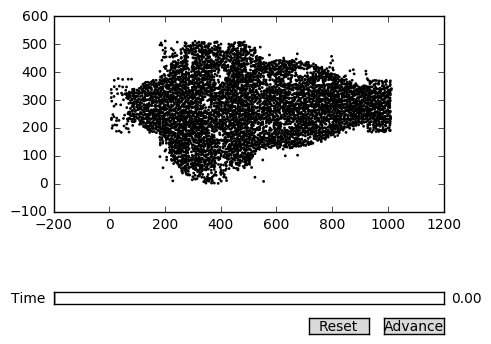

(<matplotlib.figure.Figure at 0x1f6097128>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1f6186a90>)

In [46]:
%matplotlib notebook

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
ax.set_aspect('equal')
l = plt.scatter(
    positions.X, positions.Y,
    norm=colors.Normalize(vmin=activity_min, vmax=activity_max),
    c=np.transpose(activity[:, 0]), s=1)

time_ax = plt.axes([0.25, 0.1, 0.65, 0.03])
time = Slider(time_ax, 'Time', 0.0, 1.0, valinit=0)

def update(val):
    time_i = int(round(float(activity.shape[1]) * val))
    l.set_array(np.transpose(activity[:, time_i]))
    fig.canvas.draw_idle()
time.on_changed(update)


reset_ax = plt.axes([0.675, 0.025, 0.1, 0.04])
reset_b = Button(reset_ax, 'Reset', hovercolor='0.975')

def reset(event):
    time.reset()
reset_b.on_clicked(reset)


play_ax = plt.axes([0.8, 0.025, 0.1, 0.04])
play_b = Button(play_ax, 'Advance', hovercolor='0.975')

def play(event):
    time.set_val(time.val + 0.001)
play_b.on_clicked(play)

plt.show()


In [56]:
np.max(activity)
np.min(a)


#plot_activity_heatmap(activity, 1, 100)

0.12519918696961119